In [1]:
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#read the file 
data= pd.read_csv('pharmacy_tx.csv') 
data

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00
...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,branded colifunene,322463,NaN,HO8HUGL,True,0.00
13910240,2022-12-30,Pharmacy #45,N59.44,generic tafistitrisin,664344,NaN,TFZOR5R49,False,6.28
13910241,2022-12-30,Pharmacy #54,W50.87,generic tanoclolol,691847,N098KI,6SP1DG,False,6.94
13910242,2022-12-30,Pharmacy #0,I68.27,branded prazinib,96934,S76J7V6,NaN,False,13.93


In [3]:
drugsplit=data['drug'].str.split(" ",n=1,expand=True)

In [4]:
data['Type']=drugsplit[0]
data['Drug']=drugsplit[1]
data

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,Type,Drug
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39,branded,tanoclolol
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02,branded,oxasoted
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39,branded,cupitelol
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84,generic,oxasoted
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00,branded,mamate
...,...,...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,branded colifunene,322463,NaN,HO8HUGL,True,0.00,branded,colifunene
13910240,2022-12-30,Pharmacy #45,N59.44,generic tafistitrisin,664344,NaN,TFZOR5R49,False,6.28,generic,tafistitrisin
13910241,2022-12-30,Pharmacy #54,W50.87,generic tanoclolol,691847,N098KI,6SP1DG,False,6.94,generic,tanoclolol
13910242,2022-12-30,Pharmacy #0,I68.27,branded prazinib,96934,S76J7V6,NaN,False,13.93,branded,prazinib


# Rejection

### In a previous notebook we already found a 30% increase in rejection when the drug is branded as opposed to generic.

### Now we want to explore other variables 
##### Something I suspect will impact rejected is Drug, insurance(covered by andy), and possibly diagnosis.

In [5]:
#import linear regression 
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#data_train, data_test = train_test_split(data.copy(),
 #                                                     shuffle=True,
  #                                                     random_state=435,
   #                                                    test_size=.2)

In [8]:
from sklearn import preprocessing

In [9]:
data.Drug=data.Drug.astype('category').cat.codes

In [10]:
data.Drug

0           67
1           48
2            8
3           48
4           38
            ..
13910239     7
13910240    66
13910241    67
13910242    52
13910243     1
Name: Drug, Length: 13910244, dtype: int8

In [11]:
len(data['Drug'].unique()) #77 categories of drugs

77

In [12]:
(data['Drug'].unique())

array([67, 48,  8, 38, 35, 19, 66, 52, 40, 22,  4, 57, 34, 54, 25, 24,  5,
       59, 72, 65, 60, 63, 55, 31, 14, 30, 13, 42, 69, 27, 61, 76, 10,  1,
        2, 47, 29, 44,  7,  0, 50, 75, 74, 49, 32, 17,  3,  6, 15, 73, 16,
       70, 23, 20, 33, 56, 21, 71, 64, 45,  9, 46, 28, 41, 11, 37, 58, 53,
       68, 18, 26, 62, 36, 39, 12, 51, 43], dtype=int8)

<AxesSubplot:xlabel='Drug', ylabel='Proportion'>

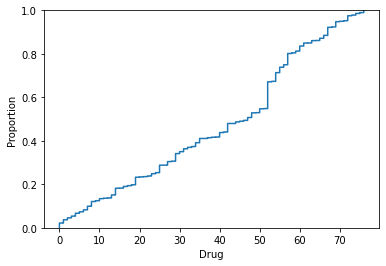

In [43]:
sn.ecdfplot(data = data, x = 'Drug') #CDF

<AxesSubplot:xlabel='Drug', ylabel='count'>

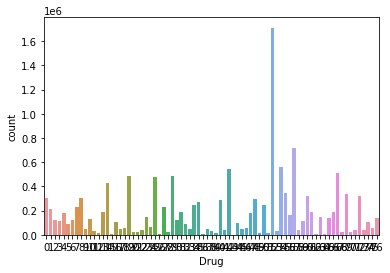

In [45]:
sn.countplot(data = data, x = 'Drug') # distribution of drug

<AxesSubplot:xlabel='Drug', ylabel='Density'>

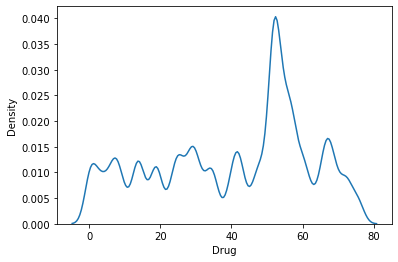

In [46]:
sn.kdeplot(data = data, x = 'Drug',bw_adjust=2) #distribution of drug variable

In [14]:
pd.get_dummies(data['rejected'])
data.loc[:,"True Rejected"] = pd.get_dummies(data['rejected'])[True].copy()

In [15]:
data

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,Type,Drug,True Rejected
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39,branded,67,0
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02,branded,48,0
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39,branded,8,0
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84,generic,48,0
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00,branded,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,branded colifunene,322463,NaN,HO8HUGL,True,0.00,branded,7,1
13910240,2022-12-30,Pharmacy #45,N59.44,generic tafistitrisin,664344,NaN,TFZOR5R49,False,6.28,generic,66,0
13910241,2022-12-30,Pharmacy #54,W50.87,generic tanoclolol,691847,N098KI,6SP1DG,False,6.94,generic,67,0
13910242,2022-12-30,Pharmacy #0,I68.27,branded prazinib,96934,S76J7V6,NaN,False,13.93,branded,52,0


In [16]:
#Now we define our X_train
X = np.ones((len(data), 2)) #intercept
X[:,1:] = data[['Drug']].values
y = data.patient_pay.values

In [17]:
## Make the model object
## notice we have to us fit_intercept = False
## because X_train has a column of 1s
reg = LinearRegression(copy_X=True, fit_intercept=False)

## Fit the model object
## note I do NOT have to use reshape here
## because X_train is a 2D np.array
est=reg.fit(X, y)

In [18]:
## look at coef
reg.coef_

array([26.61544096, -0.06339625])

In [19]:
import statsmodels.api as sm

In [20]:
mod = sm.OLS(y,X)
est = mod.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                 1.624e+04
Date:                Wed, 25 May 2022   Prob (F-statistic):               0.00
Time:                        13:35:29   Log-Likelihood:            -7.0877e+07
No. Observations:            13910244   AIC:                         1.418e+08
Df Residuals:                13910242   BIC:                         1.418e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.6154      0.023   1173.759      0.0

In [21]:
#Value is statistically significant. Pharmacuetical drug categories has a -6% effect on copay. 

In [22]:
#Now we define our X_train
X = np.ones((len(data), 2)) #intercept
X[:,1:] = data[['Drug']].values
y = data['True Rejected']

In [23]:
mod = sm.OLS(y,X)
est = mod.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:          True Rejected   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3600.
Date:                Wed, 25 May 2022   Prob (F-statistic):               0.00
Time:                        13:35:35   Log-Likelihood:            -1.4392e+06
No. Observations:            13910244   AIC:                         2.878e+06
Df Residuals:                13910242   BIC:                         2.878e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0863      0.000    560.284      0.0

In [24]:
#There is a very small statistically significant impact of Drug type on Rejected by it is only -.02% which is too small to include in a parsimonious model

## We now look at Diagnosis and Rejection

In [25]:
reject=data[data["True Rejected"]==1].count()['True Rejected']
#1086860
accept=data[data["True Rejected"]==0].count()['True Rejected']
#12823384


In [26]:
reject_percent=(reject/(accept+reject))*100
reject_percent

7.81337839940119

In [27]:
data.diagnosis=data.diagnosis.astype('category').cat.codes
data

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,Type,Drug,True Rejected
0,2022-01-02,Pharmacy #6,37,branded tanoclolol,725700,1UQC,NaN,False,13.39,branded,67,0
1,2022-01-02,Pharmacy #42,102,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02,branded,48,0
2,2022-01-02,Pharmacy #37,89,branded cupitelol,725700,1UQC,NaN,False,13.39,branded,8,0
3,2022-01-02,Pharmacy #30,102,generic oxasoted,571569,KB38N,6BYJBW,False,10.84,generic,48,0
4,2022-01-02,Pharmacy #18,75,branded mamate,664344,NaN,ZX2QUWR,False,47.00,branded,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,100,branded colifunene,322463,NaN,HO8HUGL,True,0.00,branded,7,1
13910240,2022-12-30,Pharmacy #45,76,generic tafistitrisin,664344,NaN,TFZOR5R49,False,6.28,generic,66,0
13910241,2022-12-30,Pharmacy #54,115,generic tanoclolol,691847,N098KI,6SP1DG,False,6.94,generic,67,0
13910242,2022-12-30,Pharmacy #0,52,branded prazinib,96934,S76J7V6,NaN,False,13.93,branded,52,0


In [28]:
len(data['diagnosis'].unique()) #catgories 
#133 diagnosis categories 

133

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

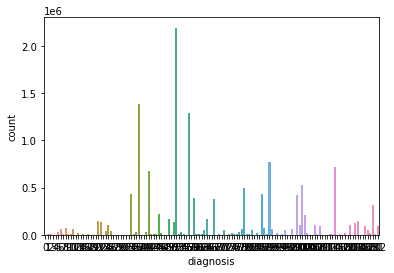

In [30]:
sn.countplot(data = data, x = 'diagnosis') # distribution of diagnosis

<AxesSubplot:xlabel='diagnosis', ylabel='Density'>

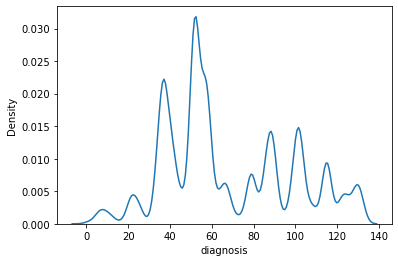

In [47]:
sn.kdeplot(data = data, x = 'diagnosis',bw_adjust=2) #distribution of drug variable

In [31]:
#Now we define our X
X = np.ones((len(data), 2)) #intercept
X[:,1:] = data[['diagnosis']].values
y = data.patient_pay.values

In [32]:
mod = sm.OLS(y,X)
est = mod.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                 4.944e+04
Date:                Wed, 25 May 2022   Prob (F-statistic):               0.00
Time:                        13:36:20   Log-Likelihood:            -7.0860e+07
No. Observations:            13910244   AIC:                         1.417e+08
Df Residuals:                13910242   BIC:                         1.417e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.8276      0.026    729.692      0.0

In [33]:
#First off, there is a significant 7.7% increase in copay with the increasing category of diagnosis

In [34]:
#Now we define our X
X = np.ones((len(data), 2)) #intercept
X[:,1:] = data[['diagnosis']].values
y = data['True Rejected']

In [35]:
mod = sm.OLS(y,X)
est = mod.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:          True Rejected   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3047.
Date:                Wed, 25 May 2022   Prob (F-statistic):               0.00
Time:                        13:36:26   Log-Likelihood:            -1.4395e+06
No. Observations:            13910244   AIC:                         2.879e+06
Df Residuals:                13910242   BIC:                         2.879e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0693      0.000    394.876      0.0

In [36]:
#Diagnosis type has a very small effect of .01% on a patient being rejected. This is not enough to include in our model. 

## Drug and Diagnosis are significant for copay but not in regards to rejected. We do not need interaction terms for them. We need an interaction term for Branded though. 

# Lets try different insurance measures such as bin pcn and group

In [37]:
data.bin=data.bin.astype('category').cat.codes
data.pcn=data.pcn.astype('category').cat.codes
data.group=data.group.astype('category').cat.codes

In [38]:
#Now we define our X
X = np.ones((len(data), 2)) #intercept
X[:,1:] = data[['bin']].values
y = data['True Rejected']

In [39]:
mod = sm.OLS(y,X)
est = mod.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:          True Rejected   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1458.
Date:                Wed, 25 May 2022   Prob (F-statistic):          5.86e-319
Time:                        13:36:41   Log-Likelihood:            -1.4403e+06
No. Observations:            13910244   AIC:                         2.881e+06
Df Residuals:                13910242   BIC:                         2.881e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0831      0.000    562.262      0.0

In [ ]:
#Not enough